# Examining and Visualizing Data

[Pandas](https://pandas.pydata.org/docs/) is a Python library used for data analysis and manipulation. Within the world of data science, it is a ubiquitous and widely used library. If you are learning how to analyze data in Python, it will be almost impossible to avoid pandas.

The central data structure of pandas is called a DataFrame. Pandas DataFrames work very closely with NumPy arrays and Pandas dataframes are specifically for data which is two dimensional (rows and columns). NumPy arrays, while similar in some ways, can work with higher dimensional data.

Pandas is very powerful. In this session, we'll be learning how to access information in pandas dataframes and how to do some basic manipulation and analysis. We are going to be looking at a dataset which gives information about the elements in the periodic table.

In [1]:
%%capture
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install pandas mols2grid seaborn rdkit matplotlib useful_rdkit_utils scikit-learn ipywidgets

In [2]:
import pandas as pd
import mols2grid
import seaborn as sns
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
import useful_rdkit_utils as uru
from IPython.core.display import HTML

In [4]:
# 1. Install and import the upload utility
from google.colab import files
import pandas as pd

# 2. Upload the file via Colab's upload widget
uploaded = files.upload()  # this prompts you to select a file

# 3. Read the CSV into a DataFrame
#    'uploaded' is a dict mapping filename to bytes, so pick the key
filename = next(iter(uploaded))
df = pd.read_csv(filename)

Saving merged_unique_molecules.csv to merged_unique_molecules.csv


In [5]:
# 4. Display the DataFrame
df

IDNUMBER                                      Chemical_Name  \
0      F2147-9803  1-(1-benzylpiperidin-4-yl)-3-methylimidazolidi...   
1      F6541-1489  1-cyclopropyl-3-(1,2,3,4-tetrahydroisoquinolin...   
2      F1739-0011  4,6-dimethyl-2-(pyrrolidin-1-yl)pyridine-3-car...   
3      F3162-0106      6,8-dimethyl-[1,2,4]triazolo[4,3-b]pyridazine   
4      F3260-0021  7-ethyl-3-methyl-8-(4-methylpiperidin-1-yl)-2,...   
...           ...                                                ...   
10525  F3398-4952  2-{[6-methyl-2-(pyrrolidin-1-yl)pyrimidin-4-yl...   
10526  F6416-5521  N-[3-(1-benzofuran-2-yl)-3-hydroxypropyl]-1-me...   
10527  F6190-1425  N-[3-(furan-2-yl)-3-hydroxypropyl]-N'-[4-methy...   
10528  F6414-3609  N-[2-(1-benzothiophen-2-yl)-2-hydroxypropyl]-2...   
10529  F6789-2364  2-cyclopropyl-N-(4-acetamidophenyl)imidazo[1,2...   

                CAS  PriceCoeff      MW Description  FSP3  clogP    TPSA  \
0        72338-84-2         1.5  273.37       solid  0.56   0.00   26.79   
1      2097865-50-2         1.5  256.34         oil  0.56   2.34   23.55   
2       693254-24-9         1.5  201.27       solid  0.50   0.00   39.92   
3        18591-75-8         1.5  148.17       solid  0.29   0.00   43.08   
4       941873-43-4         1.5  291.35       solid  0.64   0.00   70.47   
...             ...         ...     ...         ...   ...    ...     ...   
10525  1031962-03-4         1.0  380.36       solid  0.39   4.10   67.35   
10526  1448054-61-2         1.0  326.35         oil  0.22   1.04   82.78   
10527  1421476-67-6         1.0  385.41       solid  0.35   0.64  111.88   
10528  2034547-43-6         1.0  345.84       solid  0.17   3.38   77.57   
10529           NaN         1.0  335.37       solid  0.22   1.20  175.24   

       H-acceptors  ...  Activity_value  Activity_units  \
0                1  ...          3100.0              nM   
1                1  ...           550.0              nM   
2                2  ...          3548.1              nM   
3                3  ...          7943.3              nM   
4                3  ...           200.0              nM   
...            ...  ...             ...             ...   
10525            4  ...             NaN             NaN   
10526            4  ...             NaN             NaN   
10527            5  ...             NaN             NaN   
10528            2  ...             NaN             NaN   
10529            4  ...             NaN             NaN   

                                          Target_name  \
0                             Dipeptidyl peptidase II   
1                                Prolyl endopeptidase   
2      ATP-dependent Clp protease proteolytic subunit   
3      ATP-dependent Clp protease proteolytic subunit   
4                             Dipeptidyl peptidase IV   
...                                               ...   
10525                                             NaN   
10526                                             NaN   
10527                                             NaN   
10528                                             NaN   
10529                                             NaN   

                             Organism PPDS  \
0                        Homo sapiens    +   
1                        Homo sapiens  NaN   
2      Bacillus subtilis (strain 168)    +   
3      Bacillus subtilis (strain 168)    +   
4                        Homo sapiens    +   
...                               ...  ...   
10525                             NaN  NaN   
10526                             NaN  NaN   
10527                             NaN  NaN   
10528                             NaN  NaN   
10529                             NaN  NaN   

                                                  smiles  Collection  \
0                     CN1CCN(C2CCN(CC3=CC=CC=C3)CC2)C1=O         NaN   
1                    O=C1C(N2CCC3=C(C=CC=C3)C2)CCN1C1CC1         NaN   
2                            CC1=CC(C)=NC(N2CCCC2)=C1C#N         NaN

## Examining Data

In [6]:
# The .head command will display the first five rows of the dataframe.

df.head()

# In Google CoLab, you can click the variable record on the left {x} to learn more about this dataframe.

IDNUMBER                                      Chemical_Name  \
0  F2147-9803  1-(1-benzylpiperidin-4-yl)-3-methylimidazolidi...   
1  F6541-1489  1-cyclopropyl-3-(1,2,3,4-tetrahydroisoquinolin...   
2  F1739-0011  4,6-dimethyl-2-(pyrrolidin-1-yl)pyridine-3-car...   
3  F3162-0106      6,8-dimethyl-[1,2,4]triazolo[4,3-b]pyridazine   
4  F3260-0021  7-ethyl-3-methyl-8-(4-methylpiperidin-1-yl)-2,...   

            CAS  PriceCoeff      MW Description  FSP3  clogP   TPSA  \
0    72338-84-2         1.5  273.37       solid  0.56   0.00  26.79   
1  2097865-50-2         1.5  256.34         oil  0.56   2.34  23.55   
2   693254-24-9         1.5  201.27       solid  0.50   0.00  39.92   
3    18591-75-8         1.5  148.17       solid  0.29   0.00  43.08   
4   941873-43-4         1.5  291.35       solid  0.64   0.00  70.47   

   H-acceptors  ...  Activity_value  Activity_units  \
0            1  ...          3100.0              nM   
1            1  ...           550.0              nM   
2            2  ...          3548.1              nM   
3            3  ...          7943.3              nM   
4            3  ...           200.0              nM   

                                      Target_name  \
0                         Dipeptidyl peptidase II   
1                            Prolyl endopeptidase   
2  ATP-dependent Clp protease proteolytic subunit   
3  ATP-dependent Clp protease proteolytic subunit   
4                         Dipeptidyl peptidase IV   

                         Organism PPDS  \
0                    Homo sapiens    +   
1                    Homo sapiens  NaN   
2  Bacillus subtilis (strain 168)    +   
3  Bacillus subtilis (strain 168)    +   
4                    Homo sapiens    +   

                                    smiles  Collection Target Docking_score  \
0       CN1CCN(C2CCN(CC3=CC=CC=C3)CC2)C1=O         NaN    NaN           NaN   
1      O=C1C(N2CCC3=C(C=CC=C3)C2)CCN1C1CC1         NaN    NaN           NaN   
2              CC1=CC(C)=NC(N2CCCC2)=C1C#N         NaN    NaN           NaN   
3                    CC1=CC(C)=NN2C=NN=C12         NaN    NaN           NaN   
4  CCN1C(N2CCC(C)CC2)=NC2=C1C(=O)NC(=O)N2C         NaN    NaN           NaN   

  LCTNUMBER  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 26 columns]

The `.info` function will give information about the columns and the data type of those columns. The data type will become very important later as we work with data more.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10530 entries, 0 to 10529
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDNUMBER        10530 non-null  object 
 1   Chemical_Name   10530 non-null  object 
 2   CAS             10304 non-null  object 
 3   PriceCoeff      10530 non-null  float64
 4   MW              10530 non-null  float64
 5   Description     10530 non-null  object 
 6   FSP3            10530 non-null  float64
 7   clogP           10530 non-null  float64
 8   TPSA            10530 non-null  float64
 9   H-acceptors     10530 non-null  int64  
 10  H-donors        10530 non-null  int64  
 11  RotBonds        10530 non-null  int64  
 12  HAC             10530 non-null  int64  
 13  Similarity      4470 non-null   float64
 14  fromRegid       4470 non-null   object 
 15  Activity_type   4470 non-null   object 
 16  Activity_value  4470 non-null   float64
 17  Activity_units  4470 non-null  

The describe function can be used on a dataframe to quickly see statistics about columns with numerical data. If you look at the columns that statistics are computed for and compare to the data type shown from info, you will see that we only get statistics for columns which had int64 or float64 data types.

In [8]:
df.describe()

PriceCoeff            MW          FSP3         clogP          TPSA  \
count  10530.000000  10530.000000  10530.000000  10530.000000  10530.000000   
mean       1.063390    400.809519      0.301435      6.912449     88.853464   
std        0.171571     89.546629      0.165017     12.248928     31.321069   
min        1.000000    148.160000      0.000000    -11.420000      3.240000   
25%        1.000000    347.465000      0.180000      0.530000     67.802500   
50%        1.000000    397.470000      0.280000      2.830000     82.940000   
75%        1.000000    444.480000      0.400000      4.690000    106.207500   
max        5.500000    838.990000      1.000000     59.000000    244.990000   

        H-acceptors      H-donors      RotBonds           HAC   Similarity  \
count  10530.000000  10530.000000  10530.000000  10530.000000  4470.000000   
mean       4.197816      1.946059      5.884615     28.529630     0.892069   
std        1.483469      1.150444      2.447333      6.281394     0.033831   
min        0.000000      0.000000      0.000000     11.000000     0.850000   
25%        3.000000      1.000000      4.000000     25.000000     0.860000   
50%        4.000000      2.000000      6.000000     28.000000     0.880000   
75%        5.000000      3.000000      7.000000     32.000000     0.910000   
max       12.000000      8.000000     20.000000     59.000000     1.000000   

       Activity_value  Docking_score  
count     4470.000000    4536.000000  
mean      4228.832937      -7.826098  
std       3233.926617       1.183201  
min          1.000000     -11.721900  
25%       2511.900000      -8.641025  
50%       3900.000000      -8.070650  
75%       7079.500000      -7.216600  
max      10000.000000      -5.000300

This information is extremely useful for understanding the data. We can also easily visualize the distribution of each column using Pandas's ``hist`` function.

array([[<Axes: title={'center': 'PriceCoeff'}>,
        <Axes: title={'center': 'MW'}>, <Axes: title={'center': 'FSP3'}>],
       [<Axes: title={'center': 'clogP'}>,
        <Axes: title={'center': 'TPSA'}>,
        <Axes: title={'center': 'H-acceptors'}>],
       [<Axes: title={'center': 'H-donors'}>,
        <Axes: title={'center': 'RotBonds'}>,
        <Axes: title={'center': 'HAC'}>],
       [<Axes: title={'center': 'Similarity'}>,
        <Axes: title={'center': 'Activity_value'}>,
        <Axes: title={'center': 'Docking_score'}>]], dtype=object)

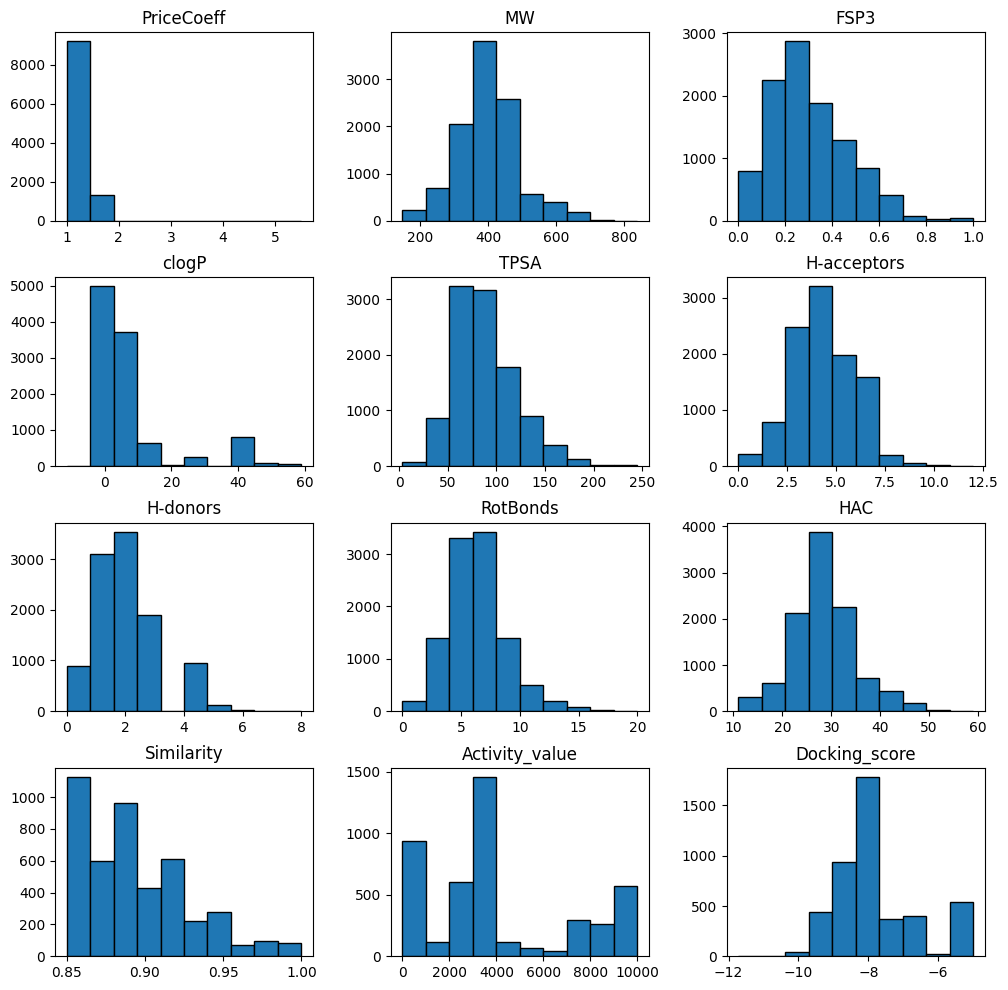

In [9]:
df.hist(figsize=(12, 12), edgecolor="black", grid=False)

## Using RDKit Functions with Pandas DataFrames
For an example more related to our work with RDKit, let's add some additional atomic data.
RDKit has the ability to get information about atoms.
We can create a periodic table with `Chem.GetPeriodicTable`, then use associated functions to get information about atoms to add more information to our existing pandas dataframe.

In [12]:
mols2grid.display(df, smiles_col="smiles",subset=["img","Activity_type","Activity_value"])

MolGridWidget()

In [15]:
# Pivot the table: each activity type becomes a column
pivot_df = df.pivot_table(index='smiles',
                          columns='Activity_type',
                          values='Activity_value',
                          aggfunc='first').reset_index()

In [18]:
print(pivot_df)

Activity_type                                             smiles  AC50  \
0                                      C(#CC1=CC=CC=C1)CN1CCOCC1   NaN   
1                  C/C(Cl)=C/CN1C(N(C)C)=NC2=C1C(=O)N(C)C(=O)N2C   NaN   
2              C/C(Cl)=C/CN1C(N(C)CC2=CC=CC=C2)=NC2=C1C(=O)N(...   NaN   
3               C/C(Cl)=C/CN1C(N2CCC(C)CC2)=NC2=C1C(=O)NC(=O)N2C   NaN   
4              C/C(Cl)=C/CN1C(N2CCC(CC3=CC=CC=C3)CC2)=NC2=C1C...   NaN   
...                                                          ...   ...   
4465           O=S(=O)(NC1=CC(C2=CN3C=CC=NC3=N2)=CC=C1)C1=CC=...   NaN   
4466           O=S(=O)(NC1=CC(C2=CN3C=CC=NC3=N2)=CC=C1)C1=CC=...   NaN   
4467           O=S(=O)(NC1=CC=C(C2=CN3C=CC=CC3=N2)C=C1)C1=CC=...   NaN   
4468           O=S(=O)(NC1=CC=C(C2=CN3C=CC=NC3=N2)C=C1)C1=CC=...   NaN   
4469           O=S(=O)(NC1=CC=C(C2=NC3=C(C=CC=C3)S2)C=C1)C1=C...   NaN   

Activity_type  Activity  EC50   IC50  IC50, Potency  Inhibition  Kd  Ki  \
0                   NaN   NaN    NaN

## Visualizing the Activity Distribution
First, let's set some reasonable defaults for plots.

In [13]:
sns.set(rc={'figure.figsize': (5,5 )})
sns.set_style('whitegrid')
sns.set_context('notebook')

Let's look at the the IC50 distribution for the compounds.  As we can see below, the default view isn't very helpful.

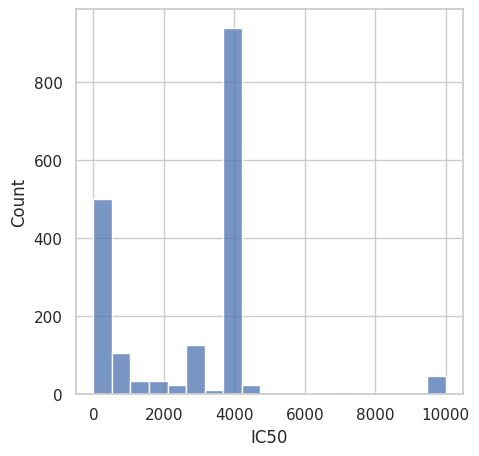

In [20]:
ax = sns.histplot(pivot_df["IC50"])

Similarly you can explore different activity values.

It's oftent easier to look at the distribution of **pIC50** values, where pIC50 is the negative log of the IC50.

In [21]:
pivot_df["pIC50"] = -np.log10(pivot_df["IC50"] * 1e-9)

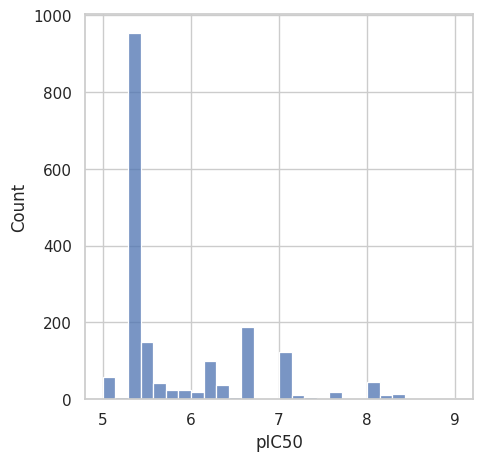

In [22]:
ax = sns.histplot(pivot_df.pIC50)

For visualization it's often helpful to bin the activity into high, medium, and low bins.  Here well put compounds with 6 < pIC50 < 7 (0.1-1$\mu$M) into the "medium" bin, and compounds with pIC50 > 7 into the "high" bin.

In [27]:
pivot_df["activity"] = pd.cut(pivot_df.pIC50,bins=[0,6,7,100],labels=["low","med","high"],right=False)

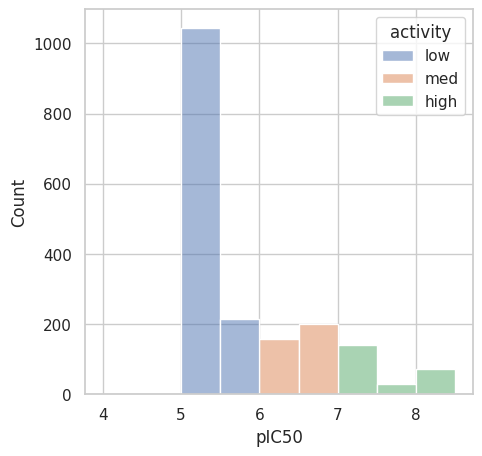

In [28]:
ax = sns.histplot(x="pIC50",hue="activity",data=pivot_df,bins=np.arange(4,9,0.5))

Now that we have the IC50 data binned into high, med, low, we can use these categories to make plots showing mulitple parameters.  Try to make a scatterplot of molecular weight (MW) vs LogP, a measure of lipophilicity.

### Understanding the Chemistry in the Downloaded Molecules
As a first step in this analysis, we will see which parts are common to all of the molecules.  To do this, we can use the Maxiumum Common Substructure (MCS) capability in the RDKit.  To use this capability, we must first convert the SMILES in our dataframe to RDKit molecule objects.  As above, we can use the Pandas apply method to do this.

In [29]:
df['mol'] = df["smiles"].apply(Chem.MolFromSmiles)

In [30]:
mcs = rdFMCS.FindMCS(df.mol)

To visualize the MCS, we have to convert it to an RDKit molecule object.

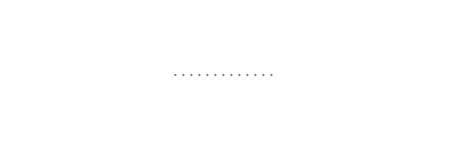

In [31]:
pat = Chem.MolFromSmarts(mcs.smartsString)
pat

The visualization above can be difficult to interpret.  The MCS tends to make more sense when we map it onto the molecules. Here we can map the MCS on to the first molecule in the dataframe and display it as a red highlight. Note how we use the utilitiy function [rd_set_image_size](https://useful-rdkit-utils.readthedocs.io/en/latest/jupyter.html#useful_rdkit_utils.jupyter_utils.rd_set_image_size) from [useful_rdkit_utils](https://useful-rdkit-utils.readthedocs.io/en/latest/index.html) to set the image size.

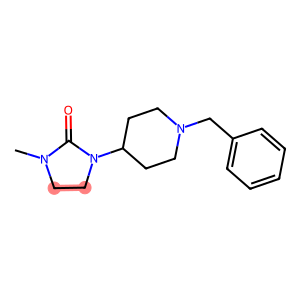

In [32]:
uru.rd_set_image_size(300,300)
df.mol.values[0].GetSubstructMatch(pat)
df.mol.values[0]

Another tool for exploring chemical datasets is the Bemis-Murcko scaffold. In this technique a molecule is reduced to a set of connected rings and linkers.  We can use the **GetScaffoldForMol**  method from the RDKit to generate Bemis-Murcko scaffolds.  

In [33]:
df['Scaffold'] = df.mol.apply(GetScaffoldForMol)

The generated scaffolds are RDKit molecule objects.  We would like to find the most frequently occuring scaffolds.  To do this, we need to convert the scaffolds to SMILES.  

In [34]:
df['Scaffold_SMILES'] = df.Scaffold.apply(Chem.MolToSmiles)

Now we can use the [value_counts_df](https://useful-rdkit-utils.readthedocs.io/en/latest/pandas.html#useful_rdkit_utils.pandas_utils.value_counts_df) method in [useful_rdkit_utils](https://useful-rdkit-utils.readthedocs.io/en/latest/index.html) count how many times each scaffold is used.  

In [35]:
scaffold_counts_df = uru.value_counts_df(df,"Scaffold_SMILES")
scaffold_counts_df.head()

Scaffold_SMILES  count
0                      O=C1/C(=C/c2ccccc2)Oc2ccccc21    259
1     O=c1[nH]c(=O)c2c(nc(N3CCNCC3)n2Cc2ccccc2)[nH]1    158
2  O=c1[nH]c(=O)c2[nH]c(N3CCN(Cc4ccccc4)CC3)nc2[nH]1    150
3               O=c1[nH]c(=O)c2c(ncn2Cc2ccccc2)[nH]1    128
4                       O=c1[nH]c(=O)c2[nH]cnc2[nH]1    126

Use the **scaffold_counts_df** we created above to view the scaffolds and their frequencies.

In [36]:
mols2grid.display(scaffold_counts_df,smiles_col="Scaffold_SMILES",subset=["img","count"],size=(250,250),
                  n_items_per_page=6)

MolGridWidget()